# Clustering Bristol Neighborhoods with Anti-Social Behavior and Noise Problems

### Introduction

Bristol is the largest city in South West of England with a population of over 460,000 and 34 neighborhoods. Bristol is one of the most popular tourist destinations whose economy is built on the creative media, electronics, aerospace industries and city center docks as symbols of heritage and culture. Bristol has a unique blend of pubs, restaurants, and Cafés that are just as famous for the street food as fine dining.

This project attempts to cluster the neighborhoods in Bristol based on the venues around their centroids and identify neighborhoods that consider anti-social behavior and noise from pubs, clubs and entertainment are problems locally. The analysis provided by this project can be useful for city planners, security agencies, charities, business investors, house buyers, etc.,  to understand the neighborhoods that share common characteristics for planning and effective decision making.

### Import Python Libraries

In [3]:
!pip install lxml
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import requests

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 5.8MB 10.8MB/s eta 0:00:01
     |████████████████████████████████| 112kB 14.2MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

### Web Scrapping for Neighborhood Data

In [4]:
!pip install html5lib
# extract several tables from wikipedia from a single page
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/List_of_wards_in_Bristol_by_population'

wikitables = read_html(page, index_col=0, attrs={"class":"wikitable"}, header=None)

# print ("Extracted {num} wikitables".format(num=len(wikitables)))

df = wikitables[0]
df = df.reset_index()
df.head()

,Rank,Map of ward,Ward,Population (2011 census)[1],Neighbourhoods contained within
0,1,NaN,Lawrence Hill,18942,"Barton Hill, St Philips Marsh, Redcliffe, Temp..."
1,2,NaN,Ashley,16225,"Baptist Mills, Montpelier, St Andrew's, St Pau..."
2,3,NaN,Cabot,15940,"Spike Island, Baltic Wharf, Redcliffe Hill, Qu..."
3,4,NaN,Bishopston,13871,"St Bonaventures and Ashley Down parishes, as w..."
4,5,NaN,Easton,13541,Lawrence Hill and Barton Hill estates


### Data Wrangling

In [5]:
# Remove column 'Map of Ward':
df = df.drop(['Map of ward'], axis = 1)

# Rename Columns to simplify names:
df = df.rename(columns={"Population (2011 census)[1]":"Population", "Neighbourhoods contained within":"Neighbourhoods"})
df.head()

,Rank,Ward,Population,Neighbourhoods
0,1,Lawrence Hill,18942,"Barton Hill, St Philips Marsh, Redcliffe, Temp..."
1,2,Ashley,16225,"Baptist Mills, Montpelier, St Andrew's, St Pau..."
2,3,Cabot,15940,"Spike Island, Baltic Wharf, Redcliffe Hill, Qu..."
3,4,Bishopston,13871,"St Bonaventures and Ashley Down parishes, as w..."
4,5,Easton,13541,Lawrence Hill and Barton Hill estates


In [6]:
df1=df
df1['Address'] = df1['Ward']+", "+"Bristol, United Kingdom"
df1.head()

,Rank,Ward,Population,Neighbourhoods,Address
0,1,Lawrence Hill,18942,"Barton Hill, St Philips Marsh, Redcliffe, Temp...","Lawrence Hill, Bristol, United Kingdom"
1,2,Ashley,16225,"Baptist Mills, Montpelier, St Andrew's, St Pau...","Ashley, Bristol, United Kingdom"
2,3,Cabot,15940,"Spike Island, Baltic Wharf, Redcliffe Hill, Qu...","Cabot, Bristol, United Kingdom"
3,4,Bishopston,13871,"St Bonaventures and Ashley Down parishes, as w...","Bishopston, Bristol, United Kingdom"
4,5,Easton,13541,Lawrence Hill and Barton Hill estates,"Easton, Bristol, United Kingdom"


In [7]:
df3 = df1.drop(['Neighbourhoods'], axis = 1)
df3.head()

,Rank,Ward,Population,Address
0,1,Lawrence Hill,18942,"Lawrence Hill, Bristol, United Kingdom"
1,2,Ashley,16225,"Ashley, Bristol, United Kingdom"
2,3,Cabot,15940,"Cabot, Bristol, United Kingdom"
3,4,Bishopston,13871,"Bishopston, Bristol, United Kingdom"
4,5,Easton,13541,"Easton, Bristol, United Kingdom"


### Community & Living Indicators Data:

##### Excel import using xlrd library

In [8]:
!pip install xlrd

df_open = pd.read_excel('Bristol Data.xlsx')
df_open.head()

,Ward,Noise Problem,Anti-Social Behaviour
0,Ashley,29.391346,42.393488
1,Avonmouth,12.609684,44.049799
2,Bedminster,17.130083,35.448836
3,Bishopston,16.436375,11.607648
4,Bishopsworth,10.415815,32.944118


Text(0.5, 1.0, '% who think noise from pubs, clubs and entertainment is a problem locally')

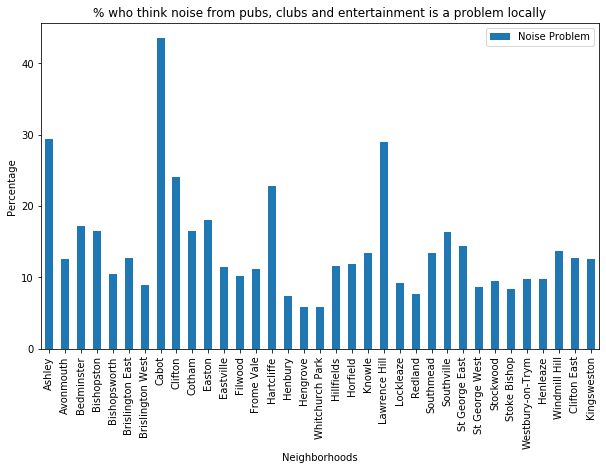

In [9]:
import matplotlib.pyplot as plt

df_open_bar = df_open.set_index(['Ward'])
df_open_bar_np = df_open_bar[['Noise Problem']]

df_open_bar_np.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('% who think noise from pubs, clubs and entertainment is a problem locally') # add title to the plot

Text(0.5, 1.0, '% who feel anti-social behaviour is a problem locally')

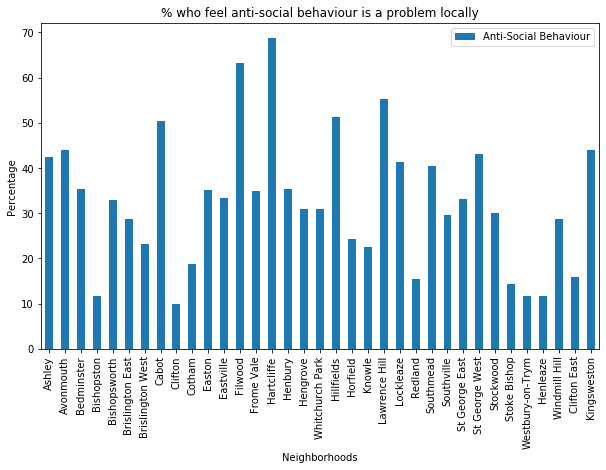

In [10]:
df_open_bar_asb = df_open_bar[['Anti-Social Behaviour']]

df_open_bar_asb.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('% who feel anti-social behaviour is a problem locally') # add title to the plot

### Add Coordiantes to the Dataframe:

##### Append coordinates columns to the dataframe using Geopy Liabrary

In [11]:
geolocator = Nominatim(user_agent="bristol_explorer")

from geopy.extra.rate_limiter import RateLimiter

geocode=RateLimiter(geolocator.geocode, min_delay_seconds=1)

df3['Coordinates'] = df3['Address'].apply(geocode)
df3.head()

,Rank,Ward,Population,Address,Coordinates
0,1,Lawrence Hill,18942,"Lawrence Hill, Bristol, United Kingdom","(Lawrence Hill, Church Road, Newtown, Lawrence..."
1,2,Ashley,16225,"Ashley, Bristol, United Kingdom","(Ashley Down, Bristol, City of Bristol, South ..."
2,3,Cabot,15940,"Cabot, Bristol, United Kingdom","(Cabot Circus, Broadmead, Bristol, City of Bri..."
3,4,Bishopston,13871,"Bishopston, Bristol, United Kingdom","(Bishopston, Bristol, City of Bristol, South W..."
4,5,Easton,13541,"Easton, Bristol, United Kingdom","(Easton, Bristol, City of Bristol, South West ..."


In [12]:
df3['latitude'] = df3['Coordinates'].apply(lambda x: x.latitude if x != None else None)
df3['longitude'] = df3['Coordinates'].apply(lambda x: x.longitude if x != None else None)
df3.head()

,Rank,Ward,Population,Address,Coordinates,latitude,longitude
0,1,Lawrence Hill,18942,"Lawrence Hill, Bristol, United Kingdom","(Lawrence Hill, Church Road, Newtown, Lawrence...",51.458580,-2.564170
1,2,Ashley,16225,"Ashley, Bristol, United Kingdom","(Ashley Down, Bristol, City of Bristol, South ...",51.478287,-2.585152
2,3,Cabot,15940,"Cabot, Bristol, United Kingdom","(Cabot Circus, Broadmead, Bristol, City of Bri...",51.458382,-2.585432
3,4,Bishopston,13871,"Bishopston, Bristol, United Kingdom","(Bishopston, Bristol, City of Bristol, South W...",51.478305,-2.595453
4,5,Easton,13541,"Easton, Bristol, United Kingdom","(Easton, Bristol, City of Bristol, South West ...",51.464703,-2.567684


In [13]:
df3 = df3.drop(df3.index[35])
df3.head()

,Rank,Ward,Population,Address,Coordinates,latitude,longitude
0,1,Lawrence Hill,18942,"Lawrence Hill, Bristol, United Kingdom","(Lawrence Hill, Church Road, Newtown, Lawrence...",51.458580,-2.564170
1,2,Ashley,16225,"Ashley, Bristol, United Kingdom","(Ashley Down, Bristol, City of Bristol, South ...",51.478287,-2.585152
2,3,Cabot,15940,"Cabot, Bristol, United Kingdom","(Cabot Circus, Broadmead, Bristol, City of Bri...",51.458382,-2.585432
3,4,Bishopston,13871,"Bishopston, Bristol, United Kingdom","(Bishopston, Bristol, City of Bristol, South W...",51.478305,-2.595453
4,5,Easton,13541,"Easton, Bristol, United Kingdom","(Easton, Bristol, City of Bristol, South West ...",51.464703,-2.567684


# Display Bristol neighborhoods on the map

##### Folium liabrary is used to to display circle marks on the map

In [14]:
address = "Bristol, United Kingdom"

geolocator = Nominatim(user_agent="bristol_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bristol city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bristol city are 51.4538022, -2.5972985.


In [15]:
map_bristol_Neighbourhoods= folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, Ward, Population in zip(
        df3['latitude'], 
        df3['longitude'], 
        df3['Ward'], 
        df3['Population']):
    label = '{}, {}'.format(Population, Ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bristol_Neighbourhoods)  

map_bristol_Neighbourhoods

In [16]:
df4 = df3[df3['Ward'].str.contains("Cabot")].reset_index(drop=True)
df4.head()

,Rank,Ward,Population,Address,Coordinates,latitude,longitude
0,3,Cabot,15940,"Cabot, Bristol, United Kingdom","(Cabot Circus, Broadmead, Bristol, City of Bri...",51.458382,-2.585432


In [17]:
map_bristol_Cabot= folium.Map(location=[latitude, longitude], zoom_start=16)
for lat, lng, Ward, Population in zip(
        df4['latitude'], 
        df4['longitude'], 
        df4['Ward'], 
        df4['Population']):
    label = '{}, {}'.format(Population, Ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='Black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bristol_Cabot)  

map_bristol_Cabot

# Import Location data using Foresquare API

In [18]:
CLIENT_ID = 'TNRQ24MKWFN2KSGP10EN5YRDEZIGOAEVN1CDQLYAKAGJQXB2'
CLIENT_SECRET = 'W14VG2SKW5S2OCBJ2HAVEASUJRGVYO3GELV0WXZWGNQM0ARK'
VERSION = '20201204'

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

In [20]:
# The function will extract the categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
# Convert the list into dataframe:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Small Street Espresso,Coffee Shop,51.454766,-2.594400
1,Swoon,Ice Cream Shop,51.452660,-2.600179
2,The Christmas Steps,Bar,51.455979,-2.596378
3,Small Bar,Pub,51.451791,-2.594948
4,Eatchu,Japanese Restaurant,51.453325,-2.594141


In [22]:
# Create the function:

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# Convert the data into a dataframe:
Bristol_venues = getNearbyVenues(names=df3['Ward'],
                                   latitudes=df3['latitude'],
                                   longitudes=df3['longitude']
                                  )
Bristol_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Hill,51.45858,-2.56417,The Climbing Academy,51.455558,-2.568958,Climbing Gym
1,Lawrence Hill,51.45858,-2.56417,Left Handed Giant Brewing Co.,51.456463,-2.571263,Brewery
2,Lawrence Hill,51.45858,-2.56417,The Trinity Centre,51.458080,-2.576293,Music Venue
3,Lawrence Hill,51.45858,-2.56417,The Lock Up,51.459560,-2.551875,Bistro
4,Lawrence Hill,51.45858,-2.56417,No. 12 Easton,51.466491,-2.564349,Café


# Data Analysis

### Top ten venues in Bristol

Text(0.5, 1.0, 'Top ten venues in Bristol')

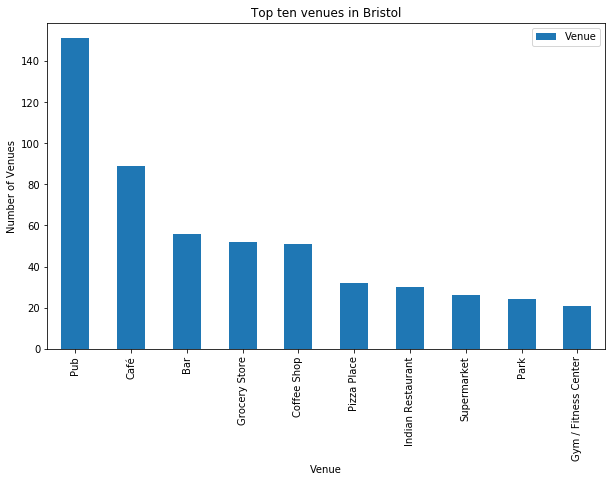

In [24]:
import matplotlib.pyplot as plt
Bristol_Bar = Bristol_venues.groupby('Venue Category').count()
Bristol_Bar = Bristol_Bar.sort_values('Venue', ascending=False)
Bristol_Bar = Bristol_Bar[['Venue']]
Bristol_Bar_head =Bristol_Bar.head(10)

Bristol_Bar_head.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Top ten venues in Bristol') # add title to the plot

### Neighborhoods with the highest venues

In [25]:
Bristol_venues_graph = Bristol_venues.groupby('Neighborhood').count()
Bristol_venues_graph.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ashley,29,29,29,29,29,29
Avonmouth,10,10,10,10,10,10
Bedminster,44,44,44,44,44,44
Bishopston,53,53,53,53,53,53
Bishopsworth,19,19,19,19,19,19


Text(0.5, 1.0, 'Neighborhoods with the highest Venues (API limit = 100)')

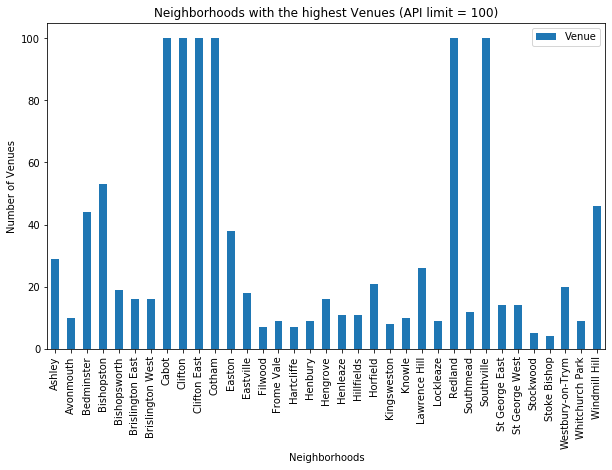

In [26]:
Bristol_venues_graph = Bristol_venues_graph.drop(['Neighborhood Latitude', 'Venue Category', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)

Bristol_venues_graph.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Neighborhoods with the highest Venues (API limit = 100)') # add title to the plot

### Onehot encoding for data preparation:

In [27]:
# Uniques categories returned for all the venues:
print('There are {} uniques categories.'.format(len(Bristol_venues['Venue Category'].unique())))

There are 146 uniques categories.


In [28]:
# one hot encoding
Bristol_denc_onehot = pd.get_dummies(Bristol_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bristol_denc_onehot['Neighborhood'] = Bristol_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Bristol_denc_onehot.columns[-1]] + list(Bristol_denc_onehot.columns[:-1])
Bristol_denc_onehot = Bristol_denc_onehot[fixed_columns]

Bristol_denc_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kitchen Supply Store,Korean Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Observatory,Office,Other Repair Shop,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Road,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Tourist Information Center,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse,Warehouse Store,Waterfront,Wine Bar,Wine Shop
0,Lawrence Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lawrence Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Lawrence Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lawrence Hill,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lawrence Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Group rows by neighborhood:
Bristol_denc_grouped = Bristol_denc_onehot.groupby('Neighborhood').mean().reset_index()
Bristol_denc_grouped.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kitchen Supply Store,Korean Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Observatory,Office,Other Repair Shop,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Road,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Club,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Tourist Information Center,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse,Warehouse Store,Waterfront,Wine Bar,Wine Shop
0,Ashley,0.0,0.000000,0.000000,0.0,0.034483,0.0,0.0,0.068966,0.068966,0.0,0.034483,0.0,0.000000,0.0,0.0,0.0,0.0,0.034483,0.0,0.000000,0.137931,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.034483,0.000000,0.0,0.0,0.000000,0.0,0.0,0.034483,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.034483,0.0,0.034483,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.068966,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.034483,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.034483,0.0,0.000000,0.0,0.0,0.000000,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.137931,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.068966,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,Avonmouth,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.100000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.100000,0.0,0.000000,0.0,0.1,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.100000,0.000000,0.0,0.0,0.100000,0.0,0.0,0.0
2,Bedminster,0.0,0.022727,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.068182,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.022727,0.0,0.022727,0.022727,0.0,0.022727,0.0,0.022727,0.000000,0.0,0.068182,0.022727,0.0,0.0,0.045455,0.0,0.0,0.00000

### Statistical measures of top ten venues in Bristol

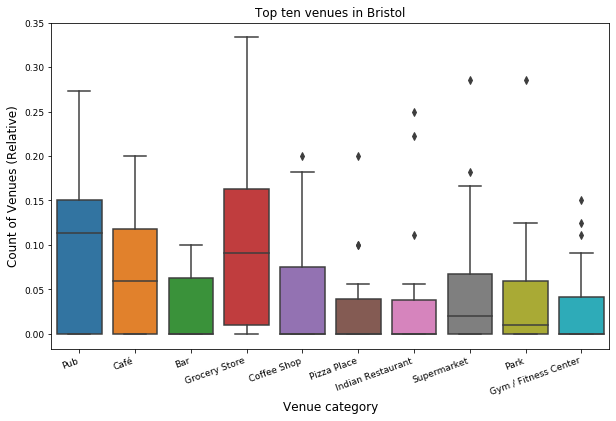

In [31]:
Bristol_denc_box = Bristol_denc_grouped[['Pub', 'Café', 'Bar', 'Grocery Store', 'Coffee Shop', 'Pizza Place', 'Indian Restaurant', 'Supermarket', 'Park', 'Gym / Fitness Center']]

import seaborn as sns
plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = Bristol_denc_box)
ax.set_ylabel('Count of Venues (Relative)', fontsize=12)
ax.set_xlabel('Venue category', fontsize=12)
plt.title('Top ten venues in Bristol') # add title to the plot
ax.tick_params(labelsize=9)
plt.xticks(rotation=20, ha='right')

plt.show()

### Clustering Neighborhoods:

#### K-means clustering technique is chosen to clusters neighborhoods with similar venues in Bristol. K-means is an unsupervised machine learning algorithm.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Bristol_denc_grouped['Neighborhood']

for ind in np.arange(Bristol_denc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bristol_denc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ashley,Pub,Café,Bakery,Bar,Gastropub,Thai Restaurant,Korean Restaurant,Park,Cricket Ground,Farm
1,Avonmouth,River,Pizza Place,Warehouse Store,Hotel,Harbor / Marina,Train Station,Construction & Landscaping,Bakery,Grocery Store,Go Kart Track
2,Bedminster,Pub,Coffee Shop,Bar,English Restaurant,Supermarket,Train Station,Convenience Store,Community Center,Furniture / Home Store,Fish & Chips Shop
3,Bishopston,Pub,Bar,Coffee Shop,Café,Grocery Store,Fish & Chips Shop,Bakery,Gastropub,Indian Restaurant,Thai Restaurant
4,Bishopsworth,Grocery Store,Furniture / Home Store,Hobby Shop,Supermarket,Pharmacy,Pet Store,Coffee Shop,Sandwich Place,Clothing Store,Shopping Plaza


In [33]:
# set number of clusters
kclusters = 3

Bristol_denc_grouped_clustering = Bristol_denc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bristol_denc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0], dtype=int32)

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bristol_denc_merged = df3

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Bristol_denc_merged = Bristol_denc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Ward')
Bristol_denc_merged.head()

,Rank,Ward,Population,Address,Coordinates,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Lawrence Hill,18942,"Lawrence Hill, Bristol, United Kingdom","(Lawrence Hill, Church Road, Newtown, Lawrence...",51.458580,-2.564170,0,Pub,Café,Brewery,Gym / Fitness Center,Supermarket,Convenience Store,Sandwich Place,Music Venue,Fast Food Restaurant,Recording Studio
1,2,Ashley,16225,"Ashley, Bristol, United Kingdom","(Ashley Down, Bristol, City of Bristol, South ...",51.478287,-2.585152,0,Pub,Café,Bakery,Bar,Gastropub,Thai Restaurant,Korean Restaurant,Park,Cricket Ground,Farm
2,3,Cabot,15940,"Cabot, Bristol, United Kingdom","(Cabot Circus, Broadmead, Bristol, City of Bri...",51.458382,-2.585432,0,Pub,Café,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Hotel,Italian Restaurant,Indian Restaurant,Park
3,4,Bishopston,13871,"Bishopston, Bristol, United Kingdom","(Bishopston, Bristol, City of Bristol, South W...",51.478305,-2.595453,0,Pub,Bar,Coffee Shop,Café,Grocery Store,Fish & Chips Shop,Bakery,Gastropub,Indian Restaurant,Thai Restaurant
4,5,Easton,13541,"Easton, Bristol, United Kingdom","(Easton, Bristol, City of Bristol, South West ...",51.464703,-2.567684,1,Pub,Grocery Store,Gym / Fitness Center,Brewery,Pizza Place,Food,Furniture / Home Store,Indian Restaurant,Climbing Gym,Café


#### Plot clusters on the map:

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        Bristol_denc_merged['latitude'], 
        Bristol_denc_merged['longitude'], 
        Bristol_denc_merged['Ward'], 
        Bristol_denc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=3).add_to(map_clusters)
       
map_clusters

#### CLuster 1: Pubs, Cafés and Coffee Shops:

In [36]:
Bristol_denc_merged.loc[Bristol_denc_merged['Cluster Labels'] == 0, Bristol_denc_merged.columns[[1] + list(range(5, Bristol_denc_merged.shape[1]))]]

,Ward,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lawrence Hill,51.458580,-2.564170,0,Pub,Café,Brewery,Gym / Fitness Center,Supermarket,Convenience Store,Sandwich Place,Music Venue,Fast Food Restaurant,Recording Studio
1,Ashley,51.478287,-2.585152,0,Pub,Café,Bakery,Bar,Gastropub,Thai Restaurant,Korean Restaurant,Park,Cricket Ground,Farm
2,Cabot,51.458382,-2.585432,0,Pub,Café,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Hotel,Italian Restaurant,Indian Restaurant,Park
3,Bishopston,51.478305,-2.595453,0,Pub,Bar,Coffee Shop,Café,Grocery Store,Fish & Chips Shop,Bakery,Gastropub,Indian Restaurant,Thai Restaurant
6,Windmill Hill,51.439745,-2.588314,0,Pub,Bar,Fast Food Restaurant,Hotel,Coffee Shop,Convenience Store,Indian Restaurant,Pharmacy,Grocery Store,Restaurant
8,Cotham,51.464970,-2.598604,0,Pub,Café,Coffee Shop,Bar,Pizza Place,Indian Restaurant,Burger Joint,Hotel,Thai Restaurant,Sandwich Place
9,Southville,51.443329,-2.601188,0,Pub,Coffee Shop,Café,Indian Restaurant,Pizza Place,English Restaurant,Bar,Art Gallery,Restaurant,Plaza
12,Bedminster,51.436739,-2.604220,0,Pub,Coffee Shop,Bar,English Restaurant,Supermarket,Train Station,Convenience Store,Community Center,Furniture / Home Store,Fish & Chips Shop
18,Redland,51.468284,-2.599143,0,Pub,Café,Bar,Coffee Shop,Pizza Place,Gastropub,Bakery,Burger Joint,Thai Restaurant,Restaurant
20,Frome Vale,51.491428,-2.529853,0,Pub,Restaurant,Miscellaneous Shop,Martial Arts Dojo,Road,English Restaurant,Park,Indian Restaurant,Playground,Electronics Store


#### Cluster 2: Supermarkets and Gym/Fitness Centers

In [37]:
Bristol_denc_merged.loc[Bristol_denc_merged['Cluster Labels'] == 1, Bristol_denc_merged.columns[[1] + list(range(5, Bristol_denc_merged.shape[1]))]]

,Ward,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Easton,51.464703,-2.567684,1,Pub,Grocery Store,Gym / Fitness Center,Brewery,Pizza Place,Food,Furniture / Home Store,Indian Restaurant,Climbing Gym,Café
5,Hillfields,51.474253,-2.518675,1,Pub,Grocery Store,Chinese Restaurant,Pharmacy,Gym / Fitness Center,Construction & Landscaping,Supermarket,Thai Restaurant,Coffee Shop,Wine Shop
7,Horfield,51.491856,-2.580096,1,Grocery Store,Convenience Store,Bus Stop,Coffee Shop,Sporting Goods Shop,Pub,Pizza Place,Café,Gym / Fitness Center,Bakery
10,Avonmouth,51.498926,-2.695544,1,River,Pizza Place,Warehouse Store,Hotel,Harbor / Marina,Train Station,Construction & Landscaping,Bakery,Grocery Store,Go Kart Track
11,Eastville,51.473305,-2.559857,1,Grocery Store,Furniture / Home Store,Pub,Park,Chinese Restaurant,Climbing Gym,Fast Food Restaurant,Scandinavian Restaurant,Café,Pet Store
13,Filwood,51.425116,-2.591613,1,Bus Station,Grocery Store,Hotel,Plaza,Fast Food Restaurant,Shopping Plaza,Pub,Gym / Fitness Center,Gym,Home Service
14,St George East,51.459566,-2.545106,1,Grocery Store,Pub,Café,Bistro,Park,Paper / Office Supplies Store,Fast Food Restaurant,Nature Preserve,Supermarket,Home Service
15,Lockleaze,51.490701,-2.565131,1,Grocery Store,Bus Stop,Warehouse Store,Asian Restaurant,Auto Garage,Convenience Store,Café,Food,Garden,Furniture / Home Store
16,Southmead,51.502168,-2.596623,1,Supermarket,Coffee Shop,Electronics Store,Soccer Field,Event Space,Food,Gym / Fitness Center,Grocery Store,Other Repair Shop,Golf Course
17,St George West,51.459566,-2.545106,1,Grocery Store,Pub,Café,Bistro,Park,Paper / Office Supplies Store,Fast Food Restaurant,Nature Preserve,Supermarket,Home Service


#### Cluster 3: Indian Restaurants

In [38]:
Bristol_denc_merged.loc[Bristol_denc_merged['Cluster Labels'] == 2, Bristol_denc_merged.columns[[1] + list(range(5, Bristol_denc_merged.shape[1]))]]

,Ward,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Stoke Bishop,51.480413,-2.635691,2,Grocery Store,Indian Restaurant,Train Station,Botanical Garden,Wine Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food & Drink Shop,Food


### K-means Evaluation to find best k:
##### Silhouette Coefficient Method is used in this case:

For n_clusters = 2 The average silhouette_score is : 0.12802198064137263
For n_clusters = 3 The average silhouette_score is : 0.13934501942815283
For n_clusters = 4 The average silhouette_score is : 0.13381173143298203
For n_clusters = 5 The average silhouette_score is : 0.13202500471046152


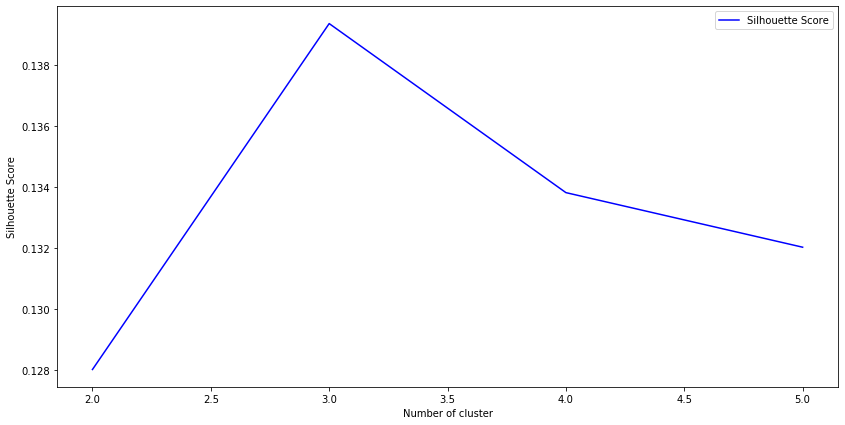

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5]
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(Bristol_denc_grouped_clustering)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(Bristol_denc_grouped_clustering, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(14,7))
#fig.add_subplot(121)
#plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")
#plt.legend()
#fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

##### The optimum K=3 where Silhouette Score is the highest

### Identify the cluster where people think noise from pubs, clubs and entertainment is a problem locally: 

In [43]:
# add clustering labels
df_open.insert(0, 'Cluster Labels', kmeans.labels_)
df_open.head()

,Cluster Labels,Ward,Noise Problem,Anti-Social Behaviour
0,0,Ashley,29.391346,42.393488
1,1,Avonmouth,12.609684,44.049799
2,0,Bedminster,17.130083,35.448836
3,0,Bishopston,16.436375,11.607648
4,1,Bishopsworth,10.415815,32.944118


In [44]:
Cluster_0 = df_open[df_open['Cluster Labels'] == 0]
Cluster_0_mean = Cluster_0['Noise Problem'].mean()
Cluster_0_mean

17.234159545027502

In [45]:
Cluster_1 = df_open[df_open['Cluster Labels'] == 1]
Cluster_1_mean = Cluster_1['Noise Problem'].mean()
Cluster_1_mean

11.721054911131667

In [46]:
Cluster_2 = df_open[df_open['Cluster Labels'] == 2]
Cluster_2_mean = Cluster_2['Noise Problem'].mean()
Cluster_2_mean

9.8125717686

##### Cluster 0 reflects the highest mean value, which means that the people of this cluster are more concerned, about the noise from pubs, clubs and entertainment, compared to the people in other clusters with less pubs. 

### Identify the cluster where people feel anti-social behaviour is a problem locally:

In [47]:
Cluster_0_as = df_open[df_open['Cluster Labels'] == 0]
Cluster_0_as_mean = Cluster_0_as['Anti-Social Behaviour'].mean()
Cluster_0_as_mean

34.33327183018437

In [48]:
Cluster_1_as = df_open[df_open['Cluster Labels'] == 1]
Cluster_1_as_mean = Cluster_1_as['Anti-Social Behaviour'].mean()
Cluster_1_as_mean

32.32006080224445

In [49]:
Cluster_2_as = df_open[df_open['Cluster Labels'] == 2]
Cluster_2_as_mean = Cluster_2_as['Anti-Social Behaviour'].mean()
Cluster_2_as_mean

11.6205393158

##### Cluster 0 reflects the highest mean value, which means that the people of this cluster are more concerned, about the anti social behavior, which may be the caused by high concentration of pubs, compared to other clusters with less pubs.